# **Problema**

* Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

* A base de dados exemplos está anexada como exemplo.csv.

* Você precisa alimentar ela com mais informações ou utilizar uma outra de sua preferência.

# **Tarefas**

Exploração de dados:

  * Carregue a base de dados e explore suas características.
  * Analise estatísticas descritivas e visualize distribuições relevantes.
       
Pré-processamento de dados:
      
  * Realize a limpeza dos dados, tratando valores ausentes (se necessário).
  * Converta variáveis categóricas em formatos adequados para modelagem.

Modelagem:
    
  * Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).      
  * Divida o conjunto de dados em conjuntos de treinamento e teste.

Treinamento e avaliação do modelo:

  * Treine o modelo com o conjunto de treinamento.
         
Validação estatística:
  * Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).


**O que avaliaremos:**

  * Apresente resultados visuais, como gráficos de previsões vs. valores reais.
  * Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.
  
**Observações:**

  * Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.
       

# **Problema**

* Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

* A base de dados exemplos está anexada como exemplo.csv.

* Você precisa alimentar ela com mais informações ou utilizar uma outra de sua preferência.

# **Tarefas**

Exploração de dados:

  * Carregue a base de dados e explore suas características.
  * Analise estatísticas descritivas e visualize distribuições relevantes.
       
Pré-processamento de dados:
      
  * Realize a limpeza dos dados, tratando valores ausentes (se necessário).
  * Converta variáveis categóricas em formatos adequados para modelagem.

Modelagem:
    
  * Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).      
  * Divida o conjunto de dados em conjuntos de treinamento e teste.

Treinamento e avaliação do modelo:

  * Treine o modelo com o conjunto de treinamento.
         
Validação estatística:
  * Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).


**O que avaliaremos:**

  * Apresente resultados visuais, como gráficos de previsões vs. valores reais.
  * Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.
  
**Observações:**

  * Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.
       

# **Entrega**

 * Como entregável, o grupo deve enviar um vídeo junto com o link do github do projeto e o código desenvolvido, apresentando o passo a passo do que foi utilizado como a fonte de dados e como os modelos foram criados.
  
 * O vídeo deve estar em uma plataforma como Youtube.


# **Solução**



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats


In [32]:
dataset = pd.read_csv("medical_insurance.csv")

In [33]:
dataset.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
0,56,feminino,29.774374,2,sim,sudoeste,31109.889763
1,46,masculino,25.857395,1,não,nordeste,26650.702647
2,32,masculino,23.014840,0,não,sudoeste,21459.037990
3,19,feminino,27.900000,0,sim,sudoeste,16884.924000
4,18,masculino,33.770000,1,não,sudeste,1725.552300


In [34]:
dataset.shape

(2775, 7)

In [35]:
dataset.describe()

,idade,imc,filhos,encargos
count,2775.000000,2775.000000,2775.000000,2775.000000
mean,39.115676,30.696500,1.101622,13275.580957
std,14.078750,6.128585,1.214450,12153.570834
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4703.000275
50%,39.000000,30.400000,1.000000,9361.326800
75%,51.000000,34.770000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


In [36]:
dataset.isnull().sum()

idade       0
genero      0
imc         0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64

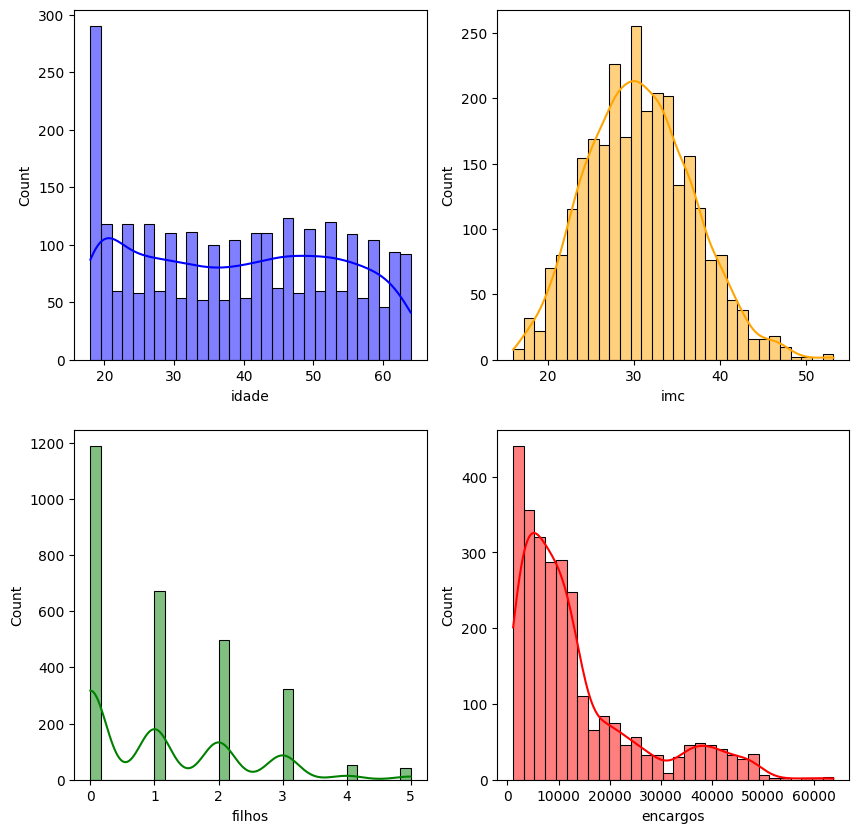

In [37]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.histplot(data=dataset, x='idade', kde=True, bins=30, color='blue', ax=axs[0, 0])
sns.histplot(data=dataset, x='imc', kde=True, bins=30, color='orange', ax=axs[0, 1])
sns.histplot(data=dataset, x='filhos', kde=True, bins=30, color='green', ax=axs[1, 0])
sns.histplot(data=dataset, x='encargos', kde=True, bins=30, color='red', ax=axs[1, 1])
plt.show()

In [38]:
def calculate_distribution(dataset, value):
    return dataset[value].value_counts(normalize=True) * 100

sex_distribution = calculate_distribution(dataset, 'genero')
region_distribution = calculate_distribution(dataset, 'regiao')
smoker_distribution = calculate_distribution(dataset, 'fumante')

fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribuição de Gênero', 'Distribuição de Região', 'Distribuição de Fumantes'), specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=sex_distribution.index, values=sex_distribution.values, name='Gênero'), 1, 1)
fig.add_trace(go.Pie(labels=region_distribution.index, values=region_distribution.values, name='Região'), 1, 2)
fig.add_trace(go.Pie(labels=smoker_distribution.index, values=smoker_distribution.values, name='Fumantes'), 1, 3)

fig.update_layout(title_text='Distribuições de Gênero, Região e Fumantes', title_x=0.5)
fig.show()

In [39]:
correlation_dataset = dataset.copy()
label_encoder = LabelEncoder()
correlation_dataset.genero = label_encoder.fit_transform(correlation_dataset.genero)
correlation_dataset.fumante = label_encoder.fit_transform(correlation_dataset.fumante)
correlation_dataset.regiao = label_encoder.fit_transform(correlation_dataset.regiao)

In [40]:
correlation_dataset.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
0,56,0,29.774374,2,1,3,31109.889763
1,46,1,25.857395,1,0,0,26650.702647
2,32,1,23.014840,0,0,3,21459.037990
3,19,0,27.900000,0,1,3,16884.924000
4,18,1,33.770000,1,0,2,1725.552300


<Axes: >

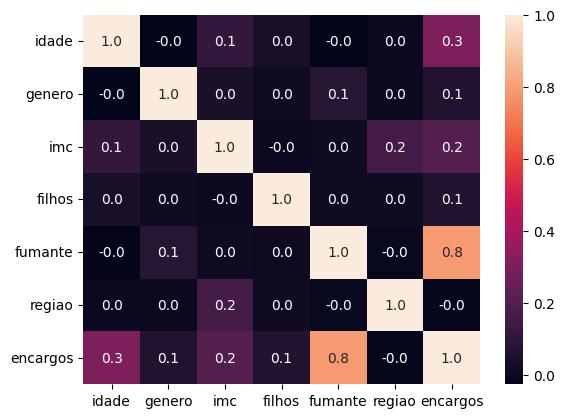

In [41]:
sns.heatmap(correlation_dataset.corr(method = 'pearson'), annot=True, fmt=".1f")

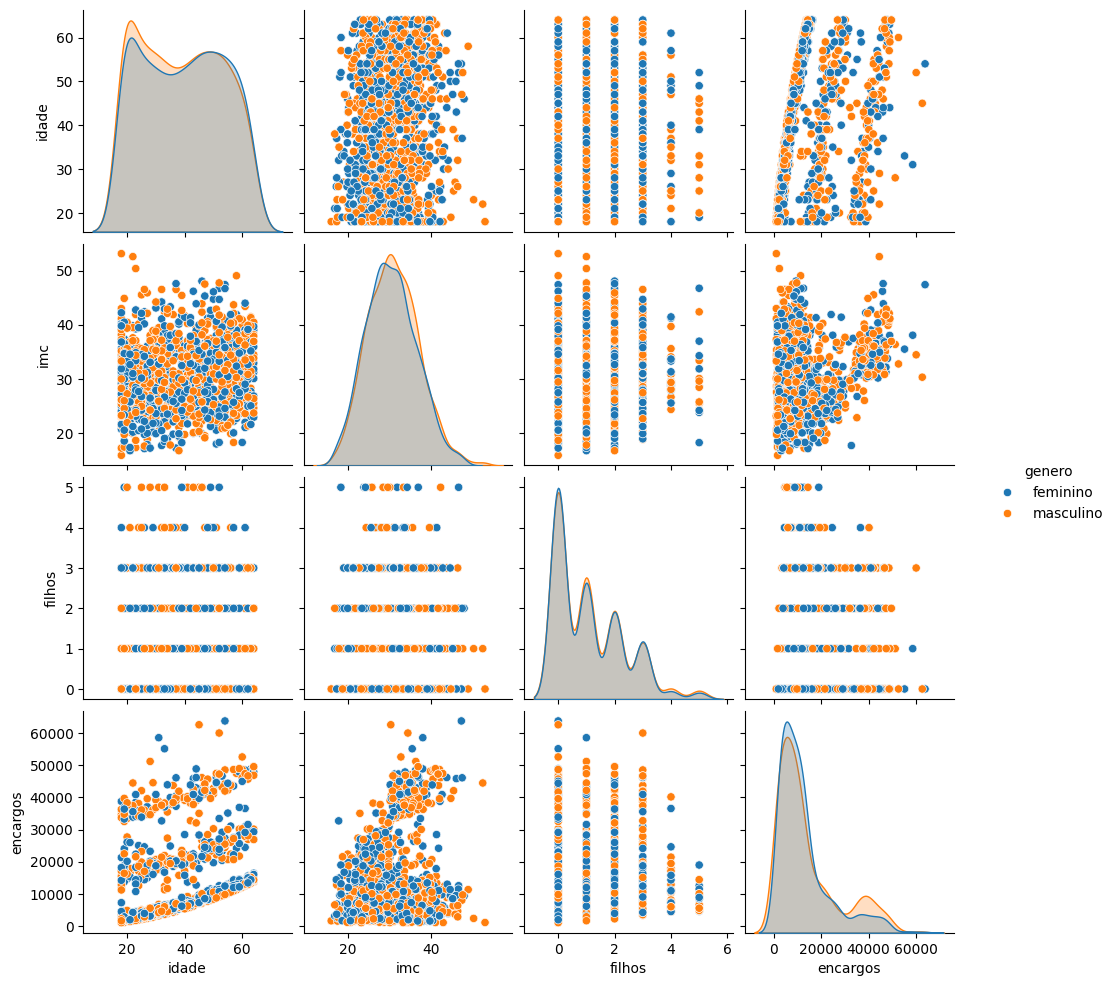

In [42]:
sns.pairplot(dataset, hue="genero")

In [43]:
df = dataset
fig = px.histogram(
    df, x="idade", y="encargos",
    color='fumante', barmode='group',
    histfunc='avg',
    height=400,
    labels={"idade": "Idade", "encargos": "Média de encargos", "fumante": "Fumante"})
fig.update_yaxes(title_text="Média de encargos")
fig.show()

In [44]:
def plot_outliers(data, value, value_title):
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(y=value, data=data)
    ax.set_title(f'Distribuição de {value_title} com Outliers')
    ax.set_ylabel(value_title)

    plt.show()

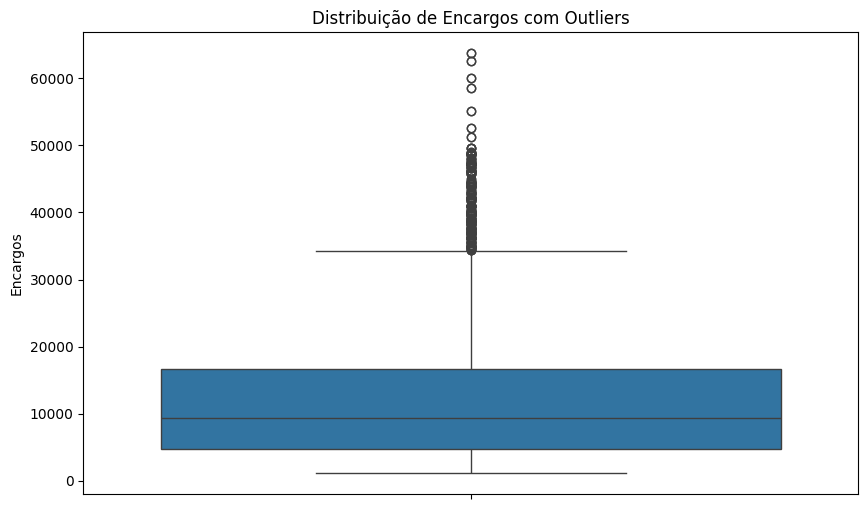

In [45]:
plot_outliers(dataset, 'encargos', 'Encargos')

In [46]:
dataset=dataset[np.abs(stats.zscore(dataset.encargos)) < 3]
#A escolha de 3 como limiar está baseada na Regra Empírica (ou Regra dos 68-95-99.7), que diz que:

#Aproximadamente 68% dos dados em uma distribuição normal estão dentro de 1 desvio padrão da média.
#Aproximadamente 95% estão dentro de 2 desvios padrão.
#Aproximadamente 99.7% estão dentro de 3 desvios padrão.
#Um z-score de 3, vamos excluir apenas os valores mais extremos, que são menos de 0.3% dos dados.

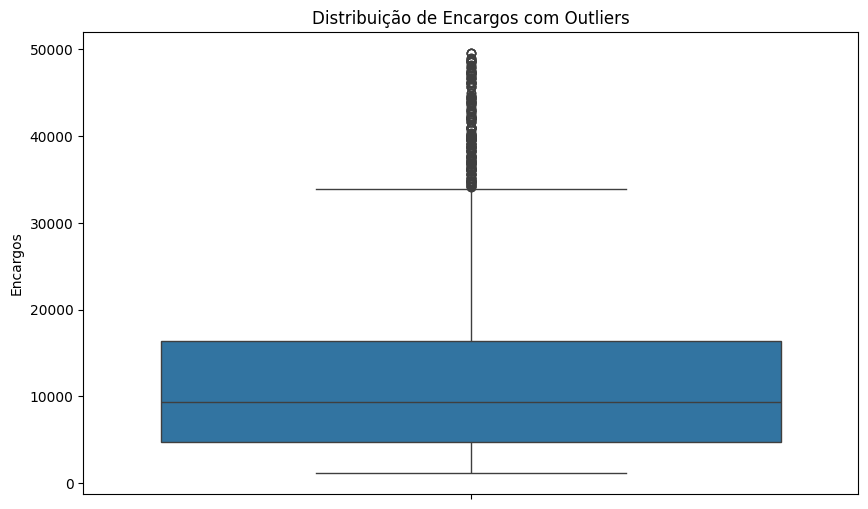

In [47]:
plot_outliers(dataset, 'encargos', 'Encargos')

In [48]:
def plot_charger_mean_graphic(data):
    mean_charges_by = data.groupby(['regiao', 'genero'])['encargos'].mean().reset_index()

    title = 'Média de Encargos por Região e Gênero'


    fig = px.bar(
        mean_charges_by, 
        x='regiao', 
        y='encargos', 
        color='genero',
        barmode='stack',
        title=title,
        labels={'regiao': 'Região', 'encargos': 'Média de Encargos'},
        text='encargos',
        height=800,
        width=1000
    )

    fig.update_layout(
        title=title,
        xaxis_title='Região',
        yaxis_title='Média de Encargos'
    )

    fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')
    fig.show()

"Encargos Médios por Região com Intervalos de Confiança" refere-se a uma análise que mostra a média dos custos ou despesas médicas (ou "encargos") para cada região geográfica, acompanhada de um intervalo de confiança que indica a variabilidade ou incerteza dessa média.

Um intervalo de confiança fornece uma faixa em torno da média que, com um certo nível de confiança (geralmente 95%), contém o valor real da média para toda a população. Ele reflete a incerteza em torno da estimativa da média.
Um intervalo de confiança mais amplo indica mais incerteza (mais variação nos dados), enquanto um intervalo mais estreito indica mais precisão (menos variação nos dados).
Visualização Gráfica:
No gráfico, as barras representam os encargos médios por região, e as "linhas" ou "barras de erro" que saem das barras principais indicam o intervalo de confiança. Se as barras de erro forem curtas, a média é estimada com maior precisão; se forem longas, há mais incerteza.


Essa visualização é útil para comparar as médias entre regiões e entender a confiança que podemos ter em cada estimativa.

In [49]:
plot_charger_mean_graphic(dataset)

In [50]:
dummies = pd.get_dummies(dataset[['genero','regiao','fumante']],dtype=int)
dataset = pd.concat([dataset[['idade','imc','filhos','encargos']],dummies],axis=1)

In [51]:
dataset.head()

,idade,imc,filhos,encargos,genero_feminino,genero_masculino,regiao_nordeste,regiao_noroeste,regiao_sudeste,regiao_sudoeste,fumante_não,fumante_sim
0,56,29.774374,2,31109.889763,1,0,0,0,0,1,0,1
1,46,25.857395,1,26650.702647,0,1,1,0,0,0,1,0
2,32,23.014840,0,21459.037990,0,1,0,0,0,1,1,0
3,19,27.900000,0,16884.924000,1,0,0,0,0,1,0,1
4,18,33.770000,1,1725.552300,0,1,0,0,1,0,1,0


In [52]:
dataset = dataset.round(2)

In [53]:
X = dataset.drop(['encargos'], axis=1)
y = dataset['encargos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [54]:
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [55]:
def generate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    abs = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape_result = calculate_mape(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {abs}')
    print(f'R-squared: {r2}')
    print(f"O MAPE é: {mape_result:.2f}%")

In [56]:
def calculate_score(model, X_train, X_test, y_train, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f'O score de treino é: {train_score}')
    print(f'O score de test é: {test_score}')

In [57]:
def cross_validation(X_train, x_axis, y_train, y_axis):
  kfold  = KFold(n_splits=10, shuffle=True) 

  x = x_axis
  y = y_axis

  linear = LinearRegression()
  linear.fit(X_train, y_train)

  knn = KNeighborsRegressor(n_neighbors=8, metric= 'euclidean', weights='distance') 
  knn.fit(X_train, y_train) 

  svm = SVR()
  svm.fit(X_train, y_train)

  rf = RandomForestRegressor(random_state=7) 
  rf.fit(X_train, y_train)

  linear_result = cross_val_score(linear, x, y, cv=kfold)
  knn_result = cross_val_score(knn, x, y, cv=kfold)
  svm_result = cross_val_score(svm, x, y, cv=kfold)
  rf_result = cross_val_score(rf, x, y, cv=kfold)

  dic_models = {
    "LINEAR": linear_result.mean(),
    "KNN": knn_result.mean(),
    "SVM": svm_result.mean(),
    "Random Forest": rf_result.mean()
  }
  
  best_model = max(dic_models, key=dic_models.get)

  print("LINEAR (R^2): {0}\nKNN (R^2): {1}\nSVM (R^2): {2}\nRandom Forest (R^2): {3}".format(linear_result.mean(), knn_result.mean(), svm_result.mean(), rf_result.mean()))
  print("O melhor modelo é o {0} com valor: {1}".format(best_model, dic_models[best_model]))
  
cross_validation(X_train, X, y_train, y)

LINEAR (R^2): 0.746704134146415
KNN (R^2): 0.939374927485591
SVM (R^2): -0.10285117356073685
Random Forest (R^2): 0.9642387485228348
O melhor modelo é o Random Forest com valor: 0.9642387485228348


In [58]:
random_grid = {
    'n_estimators': [10, 30 , 40, 100, 150, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 100,
    cv = 3,
    verbose=2,
    random_state=42,
    n_jobs = -1
)
rf_random.fit(X_train, y_train)
best_params = rf_random.best_params_
print(best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [59]:

forest_model = RandomForestRegressor(
    n_estimators= best_params['n_estimators'],
    min_samples_split= best_params['min_samples_split'],
    min_samples_leaf= best_params['min_samples_leaf'],
    max_features= best_params['max_features'],
    max_depth= best_params['max_depth'],
    bootstrap= best_params['bootstrap'],
    random_state=42
)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

generate_metrics(y_test, y_pred)
calculate_score(forest_model, X_train, X_test, y_train, y_test)


Mean Squared Error: 8049830.3775548395
Mean Absolute Error: 720.4734028061428
R-squared: 0.9421752706126656
O MAPE é: 7.17%
O score de treino é: 0.9983517292233571
O score de test é: 0.9421752706126656


In [60]:
def plot_score_graphic(y_test, y_pred):
    df = pd.DataFrame({
        'Encargos Reais': y_test,
        'Previsão de Encargos': y_pred
    })

    fig = px.scatter(df, x='Encargos Reais', y='Previsão de Encargos', 
                     title='Previsão de Encargos vs Encargos Reais',
                     labels={'Encargos Reais': 'Encargos Reais', 'Previsão de Encargos': 'Previsão de Encargos'},
                     color_discrete_sequence=['red'], width=1200, height=800)

    fig.update_traces(marker=dict(size=10))

    fig.add_scatter(x=df['Encargos Reais'], y=df['Encargos Reais'], mode='lines', name='Encargos Reais', line=dict(color='green', width=4))
    fig.show()

plot_score_graphic(y_test, y_pred)